<a href="https://colab.research.google.com/github/HomayounSoleimani/Python-for-Machine-Learning-and-Artificial-Neural-Networks/blob/master/1_03_Random_forest_classifier_on_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [0]:
# Read Data
try:
    # parse 'dteday' and 'hr' columns as date information into one column(obj)
    diabetes_df = pd.read_csv('diabetes.csv') 
except:
    # download zip folder from uci or kaggle, then unzip or
    print("Failed to read dataset")

In [3]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_df.isna().sum() # NAN values checking

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [0]:
# Devide dataframe into X and Y data
X_dia = diabetes_df.iloc[:, 0:8].values
Y_dia = diabetes_df.Outcome.values

In [6]:
print(X_dia[0],Y_dia[0])

[  6.    148.     72.     35.      0.     33.6     0.627  50.   ] 1


In [7]:
# Check distribution of each group(has and hasn't diabetes)
# 0 represents the person has diabetes
# 1 represents the person does'nt have diabetes

unique , counts = np.unique(Y_dia, return_counts=True)
print(unique, counts)

[0 1] [500 268]


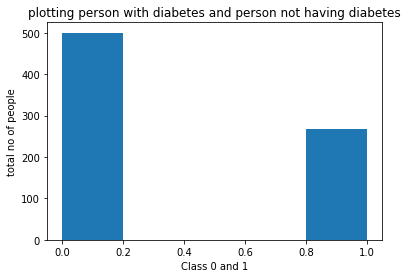

In [8]:
plt.hist(Y_dia, bins=5)
plt.title('plotting person with diabetes and person not having diabetes')
plt.ylabel('total no of people')
plt.xlabel('Class 0 and 1')
plt.show()

In [9]:
# Split X and Y data into test and train
x_train, x_test, y_train, y_test = train_test_split(X_dia, Y_dia)
# Define Classifier
clf = RandomForestClassifier(n_estimators = 35, max_features=5)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=35, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [10]:
print("The train score is {:.2f} ".format(clf.score(x_train,y_train)))
print("The test score is {:.2f} ".format(clf.score(x_test,y_test)))

The train score is 1.00 
The test score is 0.70 


In [11]:
# Use cross validation for estimate score
cv_score = cross_val_score(clf, x_test, y_test, cv=5)
print("test score for each 5-fold validation is :\n",cv_score)

test score for each 5-fold validation is :
 [0.76923077 0.58974359 0.68421053 0.76315789 0.71052632]


In [0]:
# in the best case scenario we are getting 82% accuracy

In [0]:
# Scale data and try again
scaler = StandardScaler()
x_new_train = scaler.fit_transform(x_train)
x_new_test = scaler.fit_transform(x_test)

In [14]:
clf = RandomForestClassifier()
clf.fit(x_new_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [15]:
print("Train score is {:.2f}".format(clf.score(x_new_train, y_train)))
print("Test score is {:.2f}".format(clf.score(x_new_test, y_test)))

Train score is 0.98
Test score is 0.69


In [16]:
cv_score = cross_val_score(clf, x_new_test, y_test, cv=5)
print("test score for each 5-fold validation is :\n",cv_score)

test score for each 5-fold validation is :
 [0.76923077 0.71794872 0.73684211 0.76315789 0.57894737]


**Reference**:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html